# SCENARIO 1

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Santhosh Prabhu S - 24BAD408 - EX02")
df = pd.read_csv("../data/bottle.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

### Select Features and Target

In [22]:
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

In [23]:
data = df[features + [target]].dropna(subset=[target])

X = data[features]
y = data[target]

### Handle Missing Values (X only)

In [24]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


### Feature Scaling


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

### Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Train Linear Regression Model

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predictions

In [ ]:
y_pred = lr.predict(X_test)

### Evaluation Metrics

In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Linear Regression Performance
MSE : 6.173102813367707
RMSE: 2.484572963985503
R²  : 0.6560824824754619


### Visualization

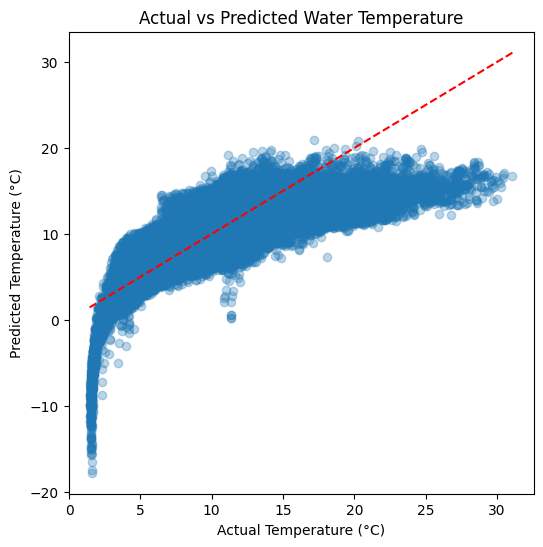

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

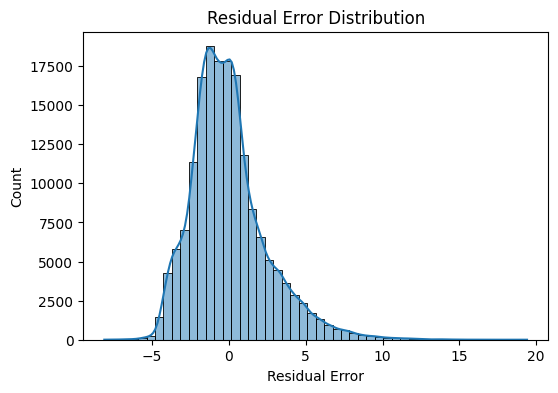

In [31]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residual Error")
plt.title("Residual Error Distribution")
plt.show()

### Ridge Regression

In [32]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("\nRidge Regression R²:", r2_score(y_test, ridge_pred))


Ridge Regression R²: 0.6560824815436032


### Lasso Regression

In [33]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

Lasso Regression R²: 0.6560260695042146


### Feature Coefficients

In [34]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_
})

print("\nLinear Regression Coefficients")
print(coef_df)


Linear Regression Coefficients
  Feature  Coefficient
0  Depthm    -1.978008
1  Salnty     0.893311
2  O2ml_L     2.627537


# SCENARIO 2

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [53]:
df = pd.read_csv("../data/LICI - Daily data.csv")
df.info()
df.columns = df.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    98 non-null     object 
 1   Open    98 non-null     float64
 2   High    98 non-null     float64
 3   Low     98 non-null     float64
 4   Close   98 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


### Create Binary Target Variable and Price Movement

In [37]:
df["Price_Movement"] = np.where(df["Close"] > df["Open"], 1, 0)


### Select Features and Target

In [38]:
features = ["Open", "High", "Low"]
target = "Price_Movement"

X = df[features]
y = df[target]

### Handle Missing Values

In [39]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

### Feature Scaling

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

### Train-Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Train Logistic Regression Model

In [42]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Predictions

In [43]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

### Evaluation Metrics

In [44]:
print("Logistic Regression Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
print(cm)

Logistic Regression Performance
Accuracy : 0.7
Precision: 0.0
Recall   : 0.0
F1-Score : 0.0

Confusion Matrix
[[14  0]
 [ 6  0]]


c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Confusion Matrix Visualization

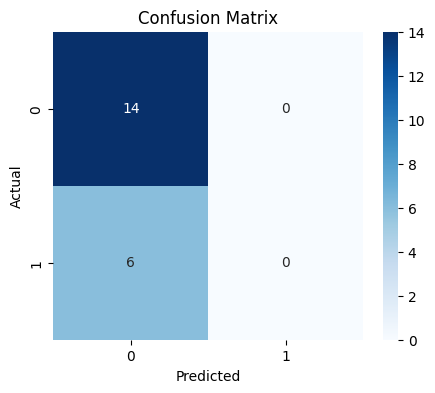

In [45]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

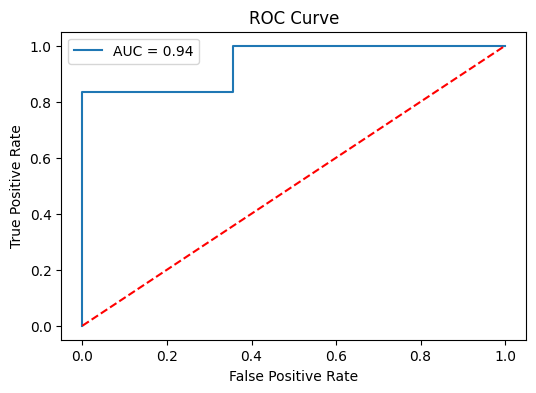

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Feature Importance


Feature Importance
  Feature  Coefficient
1    High     0.996090
2     Low     0.309411
0    Open    -1.254235


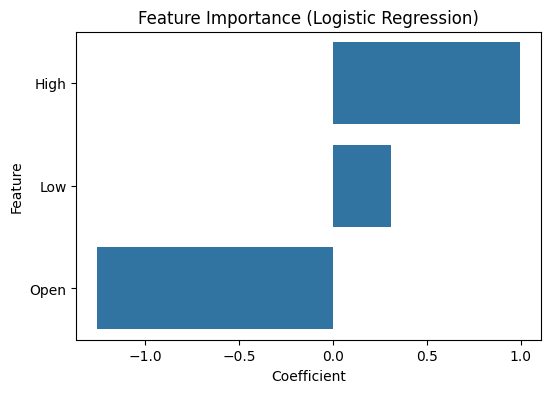

In [47]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance")
print(coef_df)

plt.figure(figsize=(6, 4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Importance (Logistic Regression)")
plt.show()

### Hyperparameter Tuning

In [50]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("\nBest Parameters from Grid Search")
print(grid.best_params_)


Best Parameters from Grid Search
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


### Evaluate Optimized Model

In [51]:
best_pred = best_model.predict(X_test)

print("\nOptimized Model Performance")
print("Accuracy :", accuracy_score(y_test, best_pred))
print("Precision:", precision_score(y_test, best_pred))
print("Recall   :", recall_score(y_test, best_pred))
print("F1-Score :", f1_score(y_test, best_pred))


Optimized Model Performance
Accuracy : 0.9
Precision: 1.0
Recall   : 0.6666666666666666
F1-Score : 0.8
